In [22]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
negative_titles = open('negative_trainingSet', 'r', encoding='gbk').readlines()
positive_titles = open('positive_trainingSet', 'r', encoding='gbk').readlines()

# 合并数据集
data = {
    'text': negative_titles + positive_titles,
    'label': [0] * len(negative_titles) + [1] * len(positive_titles)  # 0表示错误标题，1表示正确标题
}
train_df = pd.DataFrame(data)

# 2. 数据清洗函数：去掉无用字符、转换为小写等
def clean_text(text):
    text = text.lower()  # 小写化
    text = re.sub(r'\s+', ' ', text)  # 删除多余的空格
    text = re.sub(r'[^\w\s]', '', text)  # 去掉标点符号
    return text

# 对所有训练标题进行清洗
train_df['cleaned_text'] = train_df['text'].apply(clean_text)

# 加载测试集
test_df = pd.read_excel('testSet-1000.xlsx')
test_df['title given by machine'] = test_df['title given by machine'].fillna('')
print(f"NaN values in 'title given by machine' after filling: {test_df['title given by machine'].isna().sum()}")

# 将 'label' 字段从 'Y'/'N' 转换为 1/0
test_df['label'] = test_df['label'].apply(lambda x: 1 if x == 'Y' else 0)

# 创建测试集数据集对象
test_texts = test_df['title given by machine'].tolist()
test_labels = test_df['label'].tolist()

NaN values in 'title given by machine' after filling: 0


In [3]:
vectorizer = CountVectorizer(stop_words='english')  # 忽略停用词
X_train = vectorizer.fit_transform(train_df['cleaned_text'])
X_test = vectorizer.transform(test_texts)

# 标签数据
y_train = train_df['label']
y_test = test_labels

# 4. 模型训练：使用朴素贝叶斯分类器
model = MultinomialNB()
model.fit(X_train, y_train)

# 5. 模型评估
y_pred = model.predict(X_test)

# 输出评估指标
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7500
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71       432
           1       0.78      0.77      0.78       568

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



In [44]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [25]:
y_prob = model.predict_proba(X_test)

In [51]:
print(y_prob)

[[0.93720011 0.06279989]
 [0.98226897 0.01773103]
 [0.86668296 0.13331704]
 ...
 [0.93958342 0.06041658]
 [0.91823609 0.08176391]
 [0.38650417 0.61349583]]


In [26]:
tsne = TSNE(n_components=2, random_state=42)
X_train_2d = tsne.fit_transform(y_prob)

/opt/conda/lib/python3.11/site-packages/seaborn/relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


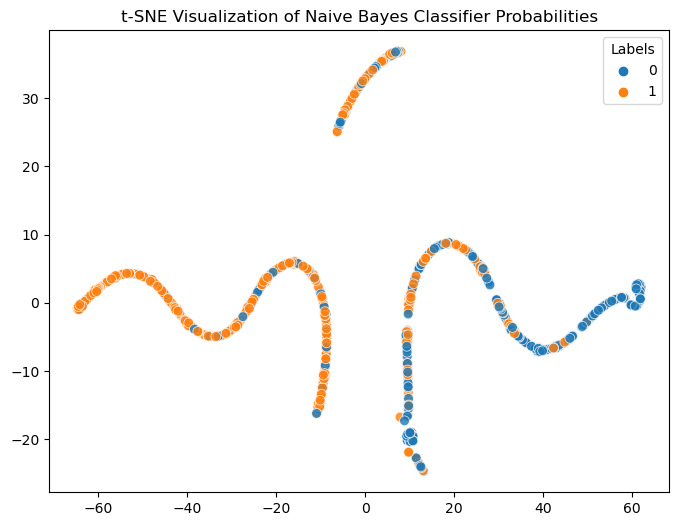

In [48]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_2d[:, 0], y=X_train_2d[:, 1], hue=y_test, cmap='coolwarm', legend="full",s=50,alpha=0.8)
plt.title('t-SNE Visualization of Naive Bayes Classifier Probabilities')
plt.legend(title="Labels")
plt.show()